## WSDM - KKBox's Music Recommendation Challenge

In this task, we are asked to predict the chances of a user listening to a song repetitively after the first observable listening event within a time window was triggered. If there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, its target is marked 1, and 0 otherwise in the training set. The same rule applies to the testing set.

KKBOX provides a training data set which consists of information of the first observable listening event for each unique user-song pair within a specific time duration. Metadata of each unique user and song pair is also provided.


Tables
#### main.csv
* msno: user id
* song_id: song id
* source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
* source_screen_name: name of the layout a user sees.
* source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.
* target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .


#### songs.csv
* The songs. Note that data is in unicode.

* song_id
* song_length: in ms
* genre_ids: genre category. Some songs have multiple genres and they are separated by |
* artist_name
* composer
* lyricist
* language

#### members.csv
user information.
* msno
* city
* bd: age. Note: this column has outlier values, please use your judgement.
* gender
* registered_via: registration method
* registration_init_time: format %Y%m%d
* expiration_date: format %Y%m%d


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading our train_dataset
train_music = pd.read_csv("data/main.csv")
train_music.rename(columns={"msno": "user_id"},inplace=True) # renaming column for better understanding
train_music.head()

,user_id,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


## Exploring the dataset

###  Train_data

In [ ]:
print("Length of the Dataset: ", len(train_music))


def unique_in_the_column(data):
    '''
    This function will return length of the unique values in the respective columns 
    '''
    for col in data.columns:
        print("Unqiue ", col, ":", len(data[col].unique()))


#getting unique values of the columns in train_data
unique_in_the_column(train_music)

Length of the Dataset:  7377418
Unqiue  user_id : 30755
Unqiue  song_id : 359966
Unqiue  source_system_tab : 9
Unqiue  source_screen_name : 21
Unqiue  source_type : 13
Unqiue  target : 2


In [ ]:
train_music.describe(include='all')

,user_id,song_id,source_system_tab,source_screen_name,source_type,target
count,7377418,7377418,7352569,6962614,7355879,7.377418e+06
unique,30755,359966,8,20,12,NaN
top,MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Local playlist more,local-library,NaN
freq,5819,13973,3684730,3228202,2261399,NaN
mean,NaN,NaN,NaN,NaN,NaN,5.035171e-01
std,NaN,NaN,NaN,NaN,NaN,4.999877e-01
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,1.000000e+00


In [ ]:
print("Total Null values in the train_dataset:\n", train_music.isnull().sum())

Total Null values in the train_dataset:
 user_id                    0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64


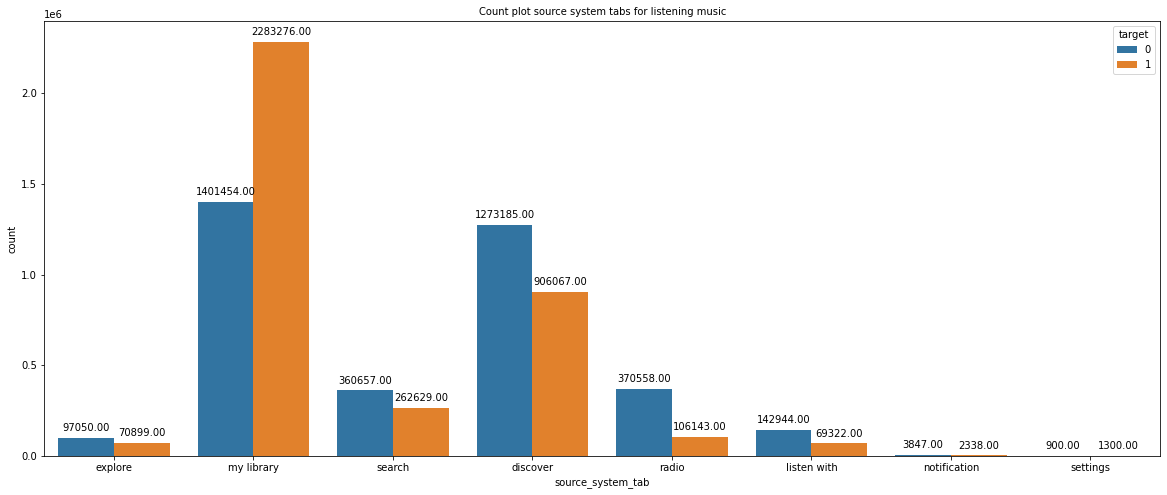

In [ ]:
plt.figure(figsize=(20,8))
plot = sns.countplot(x ='source_system_tab', data = train_music,hue="target")
plt.title('Count plot source system tabs for listening music',fontsize=10)

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2.,
                p.get_height()),
               ha = 'center',va = 'center', xytext = (0, 10), textcoords = 'offset points')

* Users listen to more songs which are stored in their library
* Songs stored in the library are the ones which user tend to listen again in a given time frame, other than that all other sources are less likely to be used

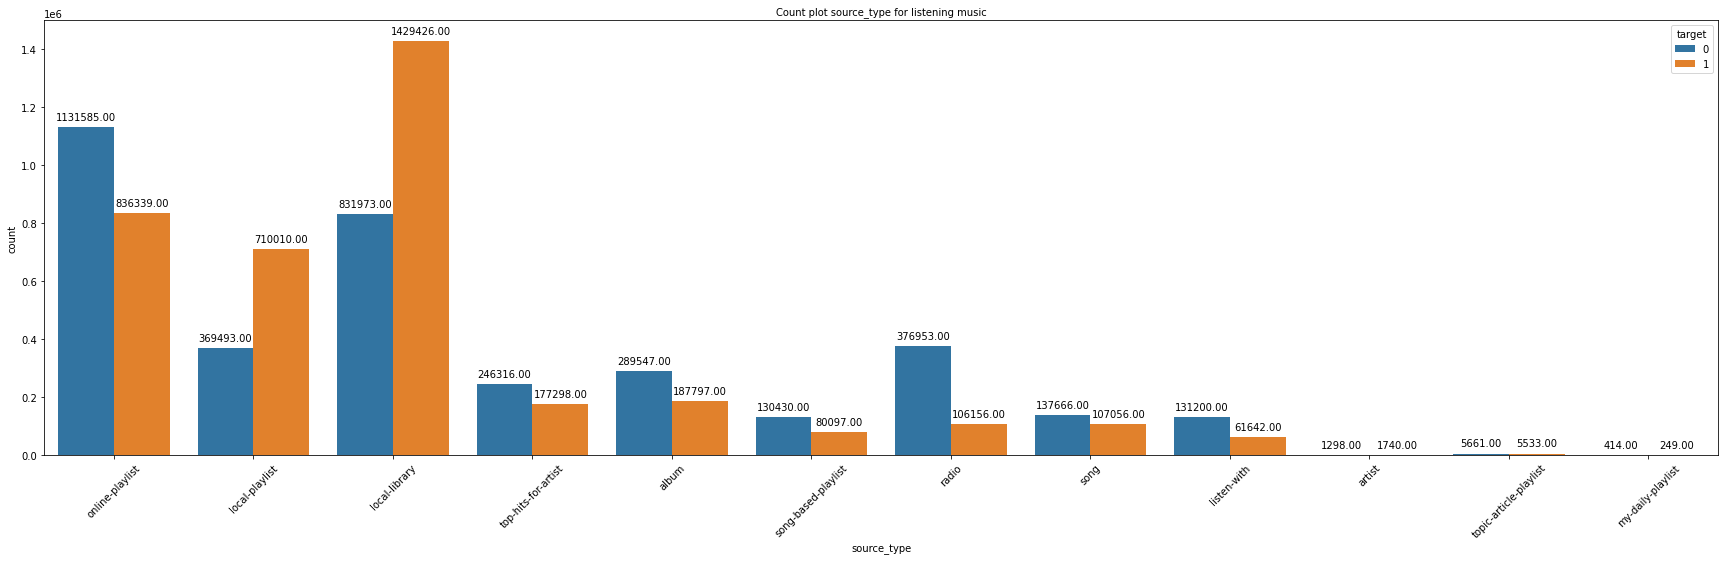

In [ ]:
plt.figure(figsize=(30,8))
plot = sns.countplot(x ='source_type', data = train_music,hue="target")
plt.title('Count plot source_type for listening music',fontsize=10)
plt.xticks(rotation='45')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2.,
                p.get_height()),
               ha = 'center',va = 'center', xytext = (0, 10), textcoords = 'offset points')

* Local library is most visited source type for users to listen to songs
* Local Library is the place where user visit to listen to songs again other than that other source type are less likely to be visted

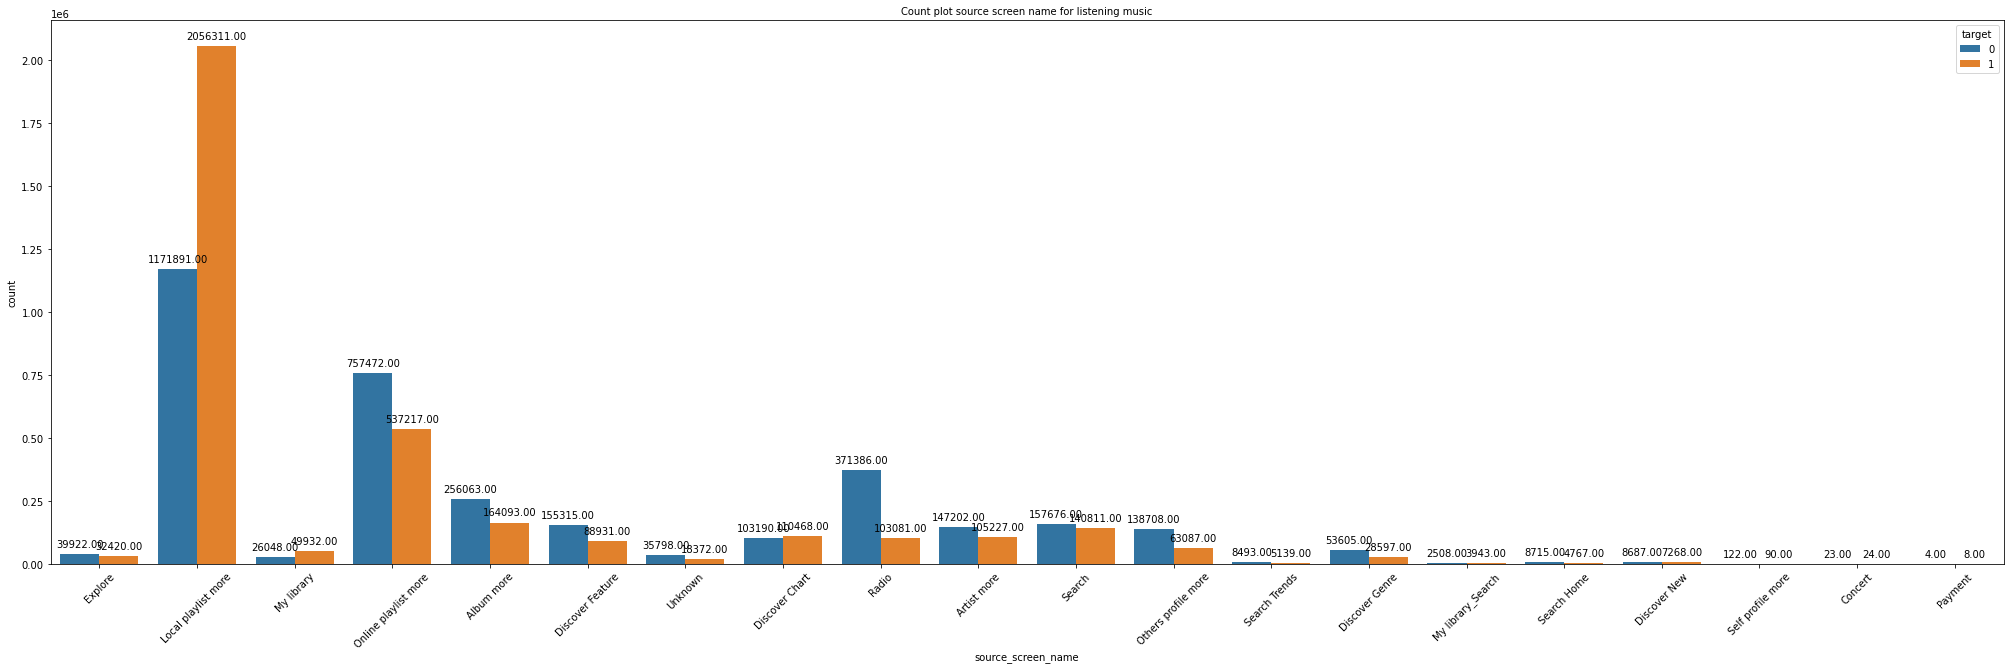

In [ ]:
plt.figure(figsize=(35,10))
plot = sns.countplot(x ='source_screen_name', data = train_music, hue="target")
plt.title('Count plot source screen name for listening music',fontsize=10)
plt.xticks(rotation='45')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2.,
                p.get_height()),
               ha = 'center',va = 'center', xytext = (0, 10), textcoords = 'offset points')

* Local playlist is most visited screen for users to listen to songs

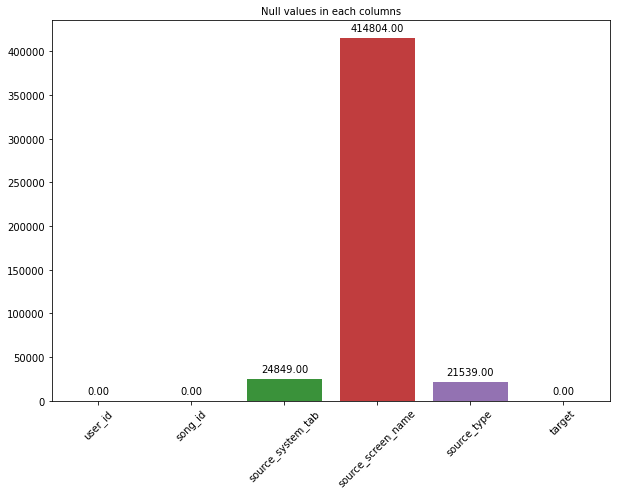

In [ ]:
plt.figure(figsize=(10,7))
plot = sns.barplot(x = train_music.columns, y = train_music.isnull().sum())
plt.title('Null values in each columns',fontsize=10)
plt.xticks(rotation='45')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2.,
                p.get_height()),
               ha = 'center',va = 'center', xytext = (0, 10), textcoords = 'offset points')

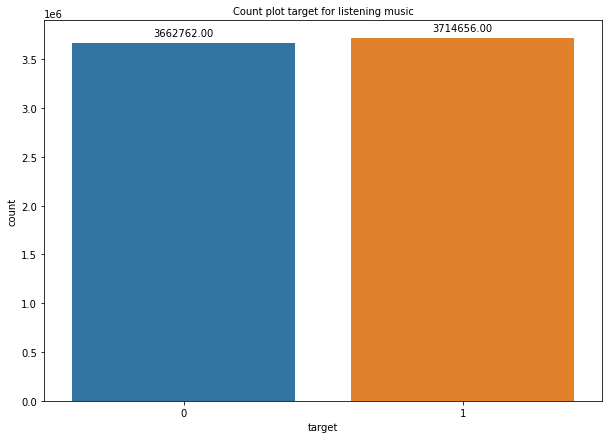

In [ ]:
plt.figure(figsize=(10,7))
plot = sns.countplot(x ='target', data = train_music)
plt.title('Count plot target for listening music',fontsize=10)

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2.,
                p.get_height()),
               ha = 'center',va = 'center', xytext = (0, 10), textcoords = 'offset points')

* Both targets have almost same size in the dataset

### On Song Data

In [ ]:
# importing songs.csv file 
songs_data = pd.read_csv("data/songs.csv")
songs_data.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
#getting unique values of the columns in songs_data
unique_in_the_column(songs_data)

Unqiue  song_id : 2296320
Unqiue  song_length : 146534
Unqiue  genre_ids : 1046
Unqiue  artist_name : 222363
Unqiue  composer : 329824
Unqiue  lyricist : 110926
Unqiue  language : 11


In [ ]:
# missing values in the data
print("Length of the song_data:",len(songs_data))
print("Total Null values in the song_dataset:\n", songs_data.isnull().sum())

Length of the song_data: 2296320
Total Null values in the song_dataset:
 song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64


In [ ]:
# combining train data and song data to visualize language
combined_train_song_data = pd.merge(train_music, songs_data, on='song_id')

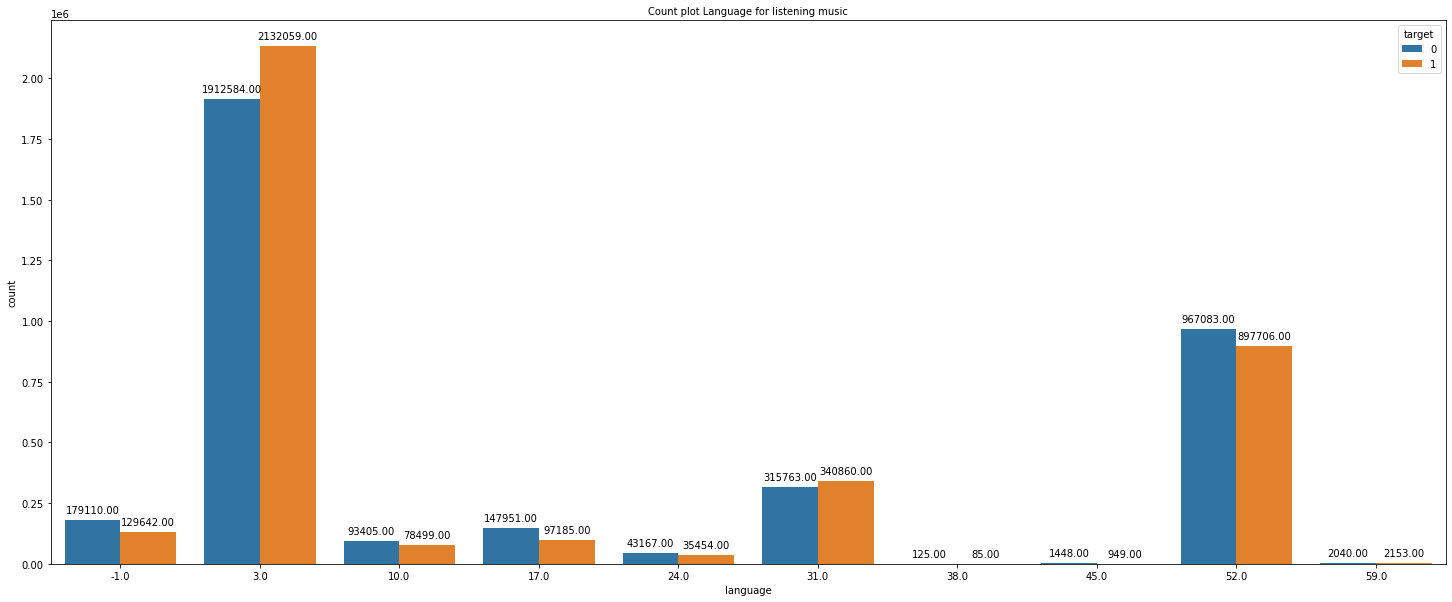

In [ ]:
plt.figure(figsize=(25,10))
plot = sns.countplot(x ='language', data = combined_train_song_data,hue='target')
plt.title('Count plot Language for listening music',fontsize=10)

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2.,
                p.get_height()),
               ha = 'center',va = 'center', xytext = (0, 10), textcoords = 'offset points')

* Song in Language 3 are the most heard songs

### On Members Data

In [ ]:
# importing member.csv file 
member_data = pd.read_csv("data/members.csv")
member_data.rename(columns={"msno": "user_id"},inplace=True) # renaming column for better understanding
member_data.head()

,user_id,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


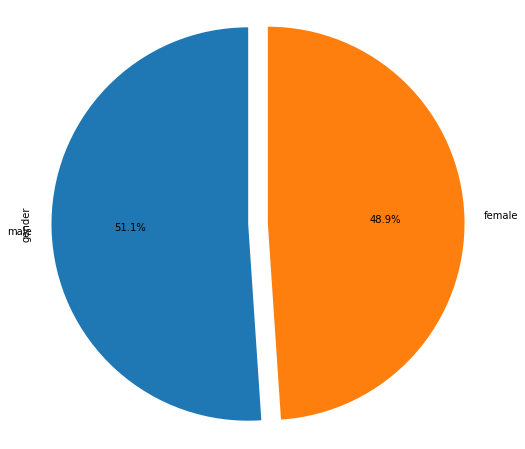

In [ ]:
plt.figure(figsize = (8, 8))
pp = pd.value_counts(member_data.gender)
pp.plot.pie(startangle=90, autopct='%1.1f%%', shadow=False, explode=(0.05, 0.05))
plt.axis('equal')
plt.show()

In [ ]:
# extracting year, month and column from the string in registration_init_timr and expiration_date
member_data['registration_year'] = member_data['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
member_data['registration_expire_year'] = member_data['expiration_date'].apply(lambda x: int(str(x)[0:4]))

member_data['registration_month'] = member_data['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
member_data['expiration_month'] = member_data['expiration_date'].apply(lambda x: int(str(x)[4:6]))

member_data['registration_date'] = member_data['registration_init_time'].apply(lambda x: int(str(x)[6:]))
member_data['registration_expiration_date'] = member_data['expiration_date'].apply(lambda x: int(str(x)[6:]))


member_data.drop(['registration_init_time','expiration_date'],axis=1,inplace=True)

member_data.head()

,user_id,city,bd,gender,registered_via,registration_year,registration_expire_year,registration_month,expiration_month,registration_date,registration_expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011,2017,8,9,20,20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015,2017,6,6,28,22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016,2017,4,7,11,12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015,2015,9,9,6,7
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017,2017,1,6,26,13


In [ ]:
#getting unique values of the columns in songs_data
unique_in_the_column(member_data)

Unqiue  user_id : 34403
Unqiue  city : 21
Unqiue  bd : 95
Unqiue  gender : 3
Unqiue  registered_via : 6
Unqiue  registration_year : 14
Unqiue  registration_expire_year : 18
Unqiue  registration_month : 12
Unqiue  expiration_month : 12
Unqiue  registration_date : 31
Unqiue  registration_expiration_date : 31


In [ ]:
# missing values in the data
print("Length of the song_data:",len(member_data))
print("Total Null values in the song_dataset:\n", member_data.isnull().sum())

Length of the song_data: 34403
Total Null values in the song_dataset:
 user_id                             0
city                                0
bd                                  0
gender                          19902
registered_via                      0
registration_year                   0
registration_expire_year            0
registration_month                  0
expiration_month                    0
registration_date                   0
registration_expiration_date        0
dtype: int64


In [ ]:
# combining member data and train data for better visualization
combined_train_member_data = pd.merge(train_music, member_data, on='user_id')

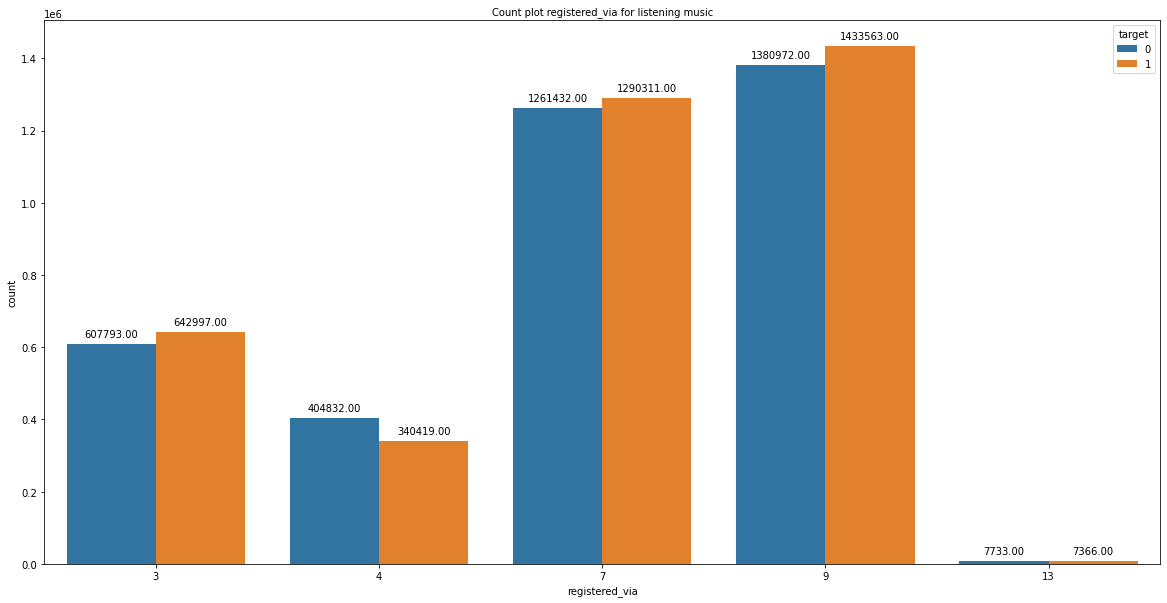

In [ ]:
plt.figure(figsize=(20,10))
plot = sns.countplot(x ='registered_via', data = combined_train_member_data,hue='target')
plt.title('Count plot registered_via for listening music',fontsize=10)

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2.,
                p.get_height()),
               ha = 'center',va = 'center', xytext = (0, 10), textcoords = 'offset points')

* Most registrations were via 7 and 9 and very few with 13

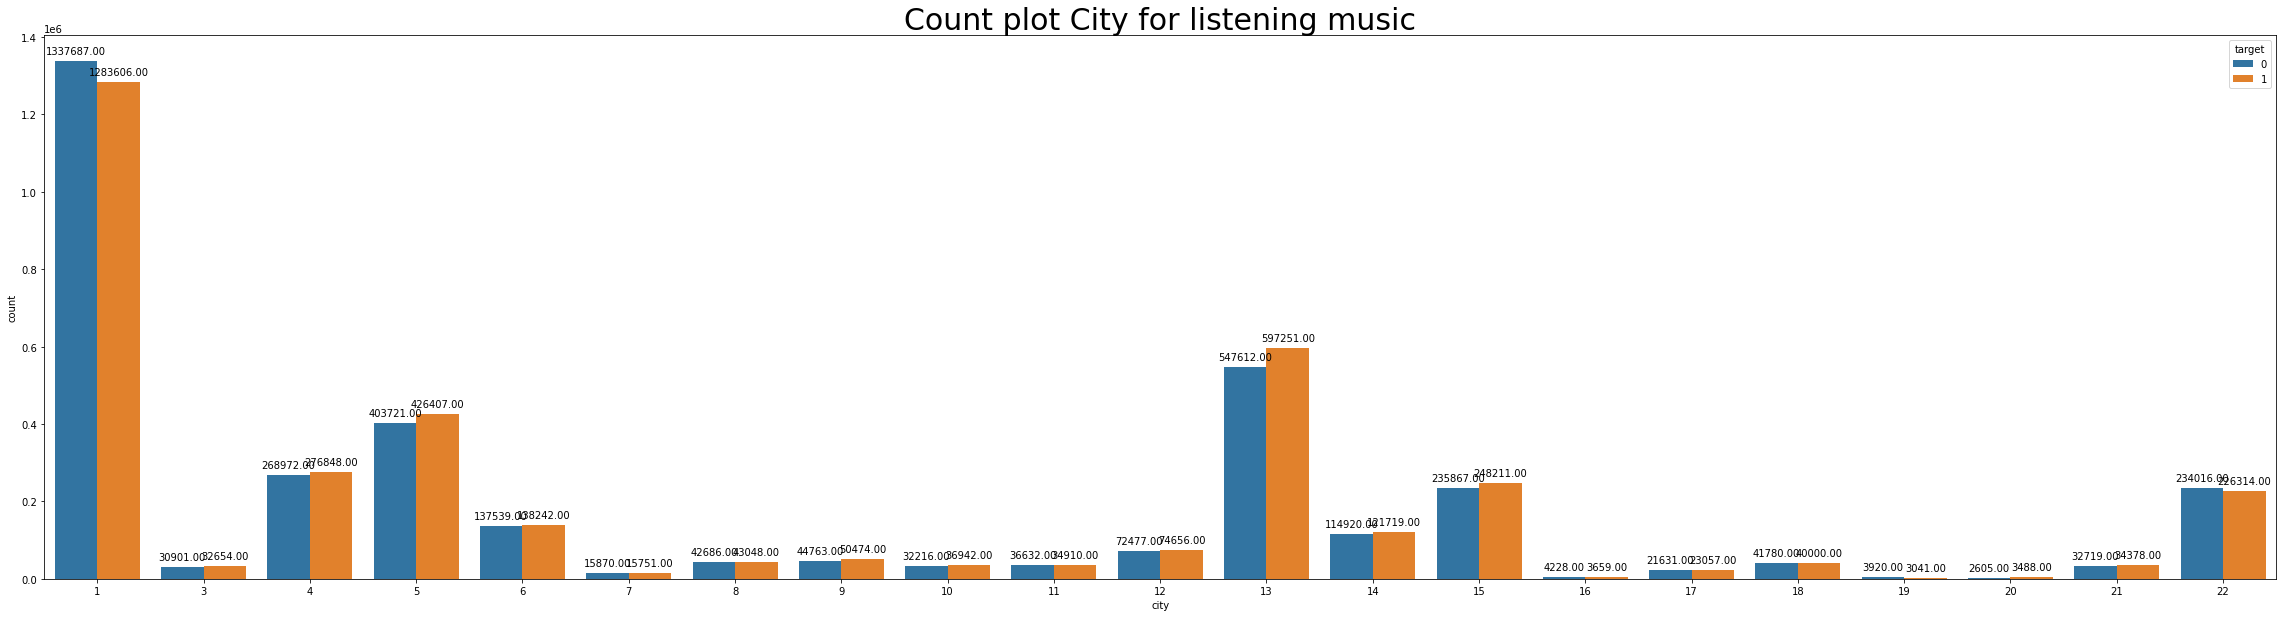

In [ ]:
plt.figure(figsize=(40,10))
plot = sns.countplot(x ='city', data = combined_train_member_data,hue='target')
plt.title('Count plot City for listening music',fontsize=30)

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2.,
                p.get_height()),
               ha = 'center',va = 'center', xytext = (0, 10), textcoords = 'offset points')

* People belonging to city 1 are the ones who use the app more

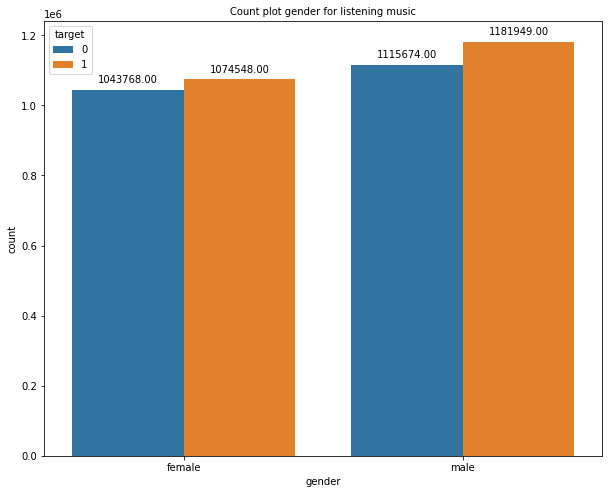

In [ ]:
plt.figure(figsize=(10,8))
plot = sns.countplot(x ='gender', data = combined_train_member_data,hue='target')
plt.title('Count plot gender for listening music',fontsize=10)

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2.,
                p.get_height()),
               ha = 'center',va = 'center', xytext = (0, 10), textcoords = 'offset points')

* The number of male are more in the dataset and they are more likely to listen to the same song again than females

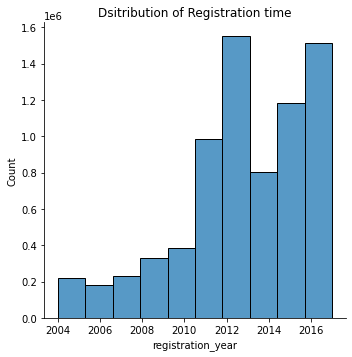

In [ ]:
# checking distribution of registration time 
sns.displot(combined_train_member_data, x="registration_year",bins=10).set(title='Dsitribution of Registration time')

* More Registration can be seen from year 2012 to 2016

In [ ]:
# checking outiers through z-score

mean_of_registration_time = np.mean(combined_train_member_data['registration_year']) 
std_of_registration_time = np.std(combined_train_member_data['registration_year'])
print("Mean of Registration Time: ",mean_of_registration_time)
print("Standard Deviation of Registartion Time: ",std_of_registration_time)

threshold = 3
outlier = [] 
for i in combined_train_member_data['registration_year']: 
    z = (i-mean_of_registration_time)/std_of_registration_time
    if z > threshold: 
        outlier.append(i) 
print('Total outlier in dataset are: ', len(outlier))

Mean of Registration Time:  2012.7405063668616
Standard Deviation of Registartion Time:  3.0188604813273914
Total outlier in dataset are:  0


* There are no outliers in the dataset in terms of registration date

Mean of Age:  17.539271192170485
Mode of Age:  0
Standard Deviation of Age:  21.554468765781245
Total outlier in dataset are:  6953
Maximum Age Outlier:  1051
Minimum Age Outlier:  83


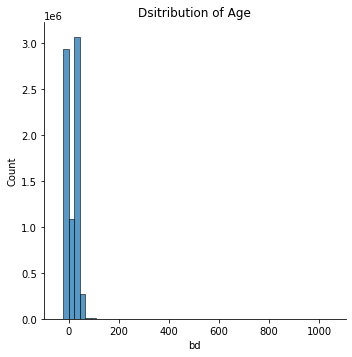

In [ ]:
# checking distribution of bd (age) 
sns.displot(combined_train_member_data, x="bd",bins=50).set(title='Dsitribution of Age')

# checking outiers through z-score

mean_of_age = np.mean(combined_train_member_data['bd']) 
mode_of_age = combined_train_member_data['bd'].mode()[0]
std_of_age = np.std(combined_train_member_data['bd'])
print("Mean of Age: ",mean_of_age)
print("Mode of Age: ",mode_of_age)
print("Standard Deviation of Age: ",std_of_age)

threshold = 3
outlier = [] 
for i in combined_train_member_data['bd']: 
    z = (i-mean_of_age)/std_of_age
    if z > threshold: 
        outlier.append(i) 
print('Total outlier in dataset are: ', len(outlier))
print("Maximum Age Outlier: ", max(outlier))
print("Minimum Age Outlier: ", min(outlier))

* According to z-score there are total 6953 outliers in the dataset with respect to age column.
* Age between 83 to 1051 are the outliers and can be removed

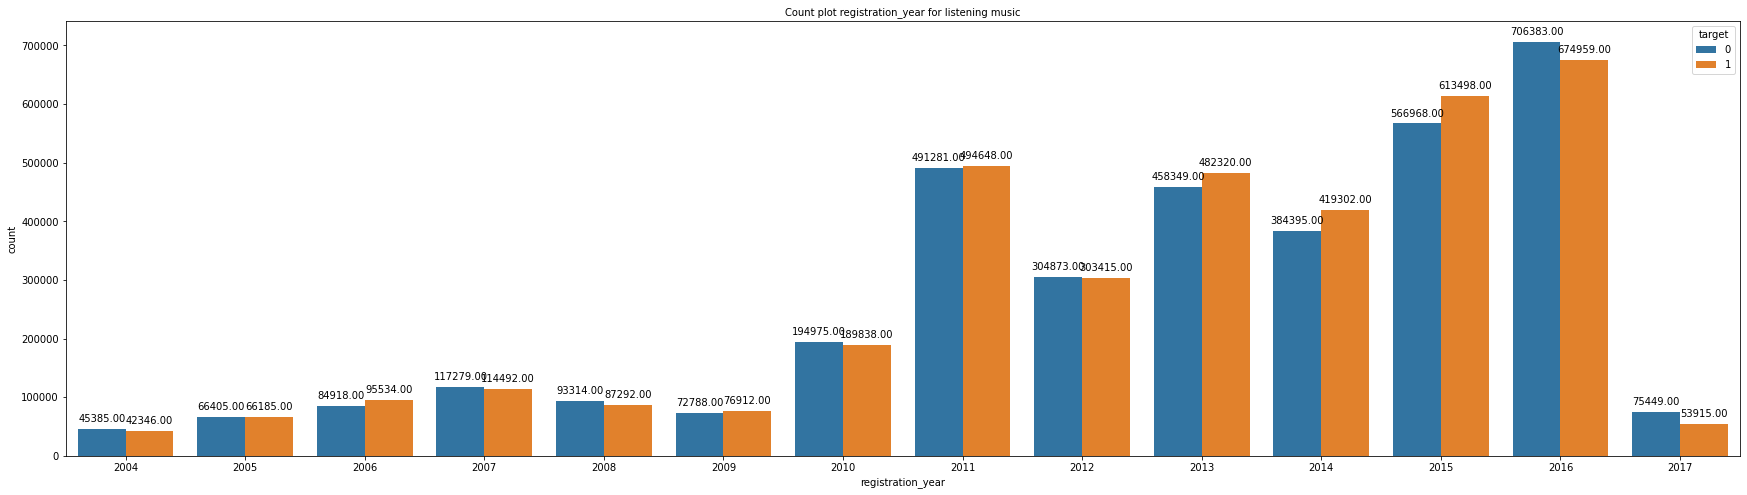

In [ ]:
plt.figure(figsize=(30,8))
plot = sns.countplot(x ='registration_year', data = combined_train_member_data,hue='target')
plt.title('Count plot registration_year for listening music',fontsize=10)

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2.,
                p.get_height()),
               ha = 'center',va = 'center', xytext = (0, 10), textcoords = 'offset points')

* As we can see in the above plot that no matter what registartion year is the target 1 and 0 are almost balanced

## Feature Engineering:

### Seperating genre_ids, Artist Names, Composer, Lyricist and counting them as in a single row there are more than one 

In [ ]:
# example for genre_ids
songs_data['genre_ids'].head(10) # for eg. the 5th and 9th have 2 or more genre ids

0                465
1                444
2                465
3                465
4                726
5    864|857|850|843
6                458
7                465
8                465
9           352|1995
Name: genre_ids, dtype: object

In [ ]:
def counting_genre_ids_artist_composer_lyricist(data):
    count = []
    for ids in data:
        try:
            if len(ids) != 0:
                count_ids = 1
                for i in ids:
                    if i == '|':
                        count_ids+=1
                count.append(count_ids)
        except TypeError:
            count.append(0)
    return count

songs_data['count_of_genre_ids'] = counting_genre_ids_artist_composer_lyricist(songs_data['genre_ids'])
songs_data['count_of_artist'] = counting_genre_ids_artist_composer_lyricist(songs_data['artist_name'])
songs_data['count_of_composer'] = counting_genre_ids_artist_composer_lyricist(songs_data['composer'])
songs_data['count_of_lyricist'] = counting_genre_ids_artist_composer_lyricist(songs_data['lyricist'])

songs_data.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,count_of_genre_ids,count_of_artist,count_of_composer,count_of_lyricist
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,1,1,1,1
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0,1,1,3,1
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0,1,1,0,0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0,1,1,1,1
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0,1,1,1,1


In [ ]:
songs_data.head(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,count_of_genre_ids,count_of_artist,count_of_composer,count_of_lyricist
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,1,1,1,1
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0,1,1,3,1
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0,1,1,0,0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0,1,1,1,1
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0,1,1,1,1
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0,4,1,1,1
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0,1,1,1,0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,光良 (Michael Wong),光良,彭資閔,3.0,1,1,1,1
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0,1,1,1,1
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0,2,1,5,5


### Removing Age 
* between 83 to 1051 as they are outliers in the members dataset
* Age which are equal to 0 and less than 0


In [ ]:
member_data.drop(member_data[member_data['bd'] > 82].index, inplace = True)
member_data.drop(member_data[member_data['bd'] <= 0].index, inplace = True)

## Handling Missing Values

*we will handle missing values in three ways or make three models and see which performs the best:-
* 1: We will use mode to replace values in the column
* 2: we will remove them from the dataset
* 3: We will add a new category as missing in the column

In [ ]:
# merging all the data we have
merged_music_data = pd.merge(train_music, member_data, on='user_id')
merged_music_data = pd.merge(merged_music_data,songs_data, on='song_id')
merged_music_data.head()

,user_id,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,song_length,genre_ids,artist_name,composer,lyricist,language,count_of_genre_ids,count_of_artist,count_of_composer,count_of_lyricist
0,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,...,284584,1259,Various Artists,NaN,NaN,52.0,1,1,0,0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,...,225396,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,1,1,1,0
2,frZtrrN1Y2ZqZX3VFiq7FpAvLth3kZJNovT9cmyn2O4=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,radio,Radio,radio,0,22,31,male,3,...,225396,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,1,1,1,0
3,BBox7sGGCdPkB12i3nWaMAv/ggYUEtfOWKkrbRMb3gk=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,radio,Radio,radio,0,13,58,female,3,...,225396,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,1,1,1,0
4,O7OWTSBR3kYP6neyMMy5+u9mUFgIN4iFETbDgzB2YQM=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,17,female,3,...,225396,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,1,1,1,0


In [ ]:
print("Length of Merged Dataset: ",len(merged_music_data))
merged_music_data.isnull().sum()

Length of Merged Dataset:  4429697


user_id                               0
song_id                               0
source_system_tab                 16841
source_screen_name               229539
source_type                       13748
target                                0
city                                  0
bd                                    0
gender                           148251
registered_via                        0
registration_year                     0
registration_expire_year              0
registration_month                    0
expiration_month                      0
registration_date                     0
registration_expiration_date          0
song_length                           0
genre_ids                         70859
artist_name                           0
composer                         992843
lyricist                        1884462
language                             23
count_of_genre_ids                    0
count_of_artist                       0
count_of_composer                     0


### Calculating % of data missing in each column

In [ ]:
percent_missing = merged_music_data.isnull().sum() * 100 / len(merged_music_data)
percent_missing

user_id                          0.000000
song_id                          0.000000
source_system_tab                0.380184
source_screen_name               5.181822
source_type                      0.310360
target                           0.000000
city                             0.000000
bd                               0.000000
gender                           3.346753
registered_via                   0.000000
registration_year                0.000000
registration_expire_year         0.000000
registration_month               0.000000
expiration_month                 0.000000
registration_date                0.000000
registration_expiration_date     0.000000
song_length                      0.000000
genre_ids                        1.599635
artist_name                      0.000000
composer                        22.413339
lyricist                        42.541555
language                         0.000519
count_of_genre_ids               0.000000
count_of_artist                  0

* Column Gender, Lyricist have more than 40% data missing

### Filling Data with Mode

In [ ]:
mode_merged_data = merged_music_data.copy()

for col in mode_merged_data.columns:
    mode_merged_data[col].fillna(mode_merged_data[col].mode()[0],inplace=True)

In [ ]:
# replacing string varibales with numeric values
column = ['user_id','song_id','source_system_tab','source_screen_name','source_type','gender',
          'artist_name','composer','lyricist','genre_ids','language',"song_length"]

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

def label_encoding(data):
    for col in column:
        print(col)
        data[col]= label_encoder.fit_transform(data[col])
        
    return data
    
label_encoding(mode_merged_data)

user_id
song_id
source_system_tab
source_screen_name
source_type
gender
artist_name
composer
lyricist
genre_ids
language
song_length


,user_id,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,song_length,genre_ids,artist_name,composer,lyricist,language,count_of_genre_ids,count_of_artist,count_of_composer,count_of_lyricist
0,7601,173446,3,8,4,1,13,24,0,9,...,32983,81,25520,54848,27083,8,1,1,0,0
1,7601,93807,3,8,4,1,13,24,0,9,...,20891,81,17074,36670,27083,8,1,1,1,0
2,9317,93807,5,14,7,0,22,31,1,3,...,20891,81,17074,36670,27083,8,1,1,1,0
3,2773,93807,5,14,7,0,13,58,0,3,...,20891,81,17074,36670,27083,8,1,1,1,0
4,5466,93807,3,8,4,1,13,17,0,3,...,20891,81,17074,36670,27083,8,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4429692,8523,34508,6,0,0,1,22,20,1,3,...,16503,308,16692,1668,27083,4,1,1,1,0
4429693,401,33206,6,0,0,0,22,18,1,3,...,19158,317,24660,54848,27083,8,1,1,0,0
4429694,5939,214693,6,15,8,1,5,31,1,9,...,27339,311,25520,53575,19625,1,1,1,1,1
4429695,12648,73757,3,8,4,1,12,35,1,3,...,9340,317,31738,20668,11086,4,1,1,1,1


### 2: Removing All null values

In [ ]:
removed_null_data = merged_music_data.copy()

removed_null_data.dropna(inplace = True)
print("Length of data after removing missing values: ",len(removed_null_data))

removed_null_data.isnull().sum()

Length of data after removing missing values:  2273588


user_id                         0
song_id                         0
source_system_tab               0
source_screen_name              0
source_type                     0
target                          0
city                            0
bd                              0
gender                          0
registered_via                  0
registration_year               0
registration_expire_year        0
registration_month              0
expiration_month                0
registration_date               0
registration_expiration_date    0
song_length                     0
genre_ids                       0
artist_name                     0
composer                        0
lyricist                        0
language                        0
count_of_genre_ids              0
count_of_artist                 0
count_of_composer               0
count_of_lyricist               0
dtype: int64

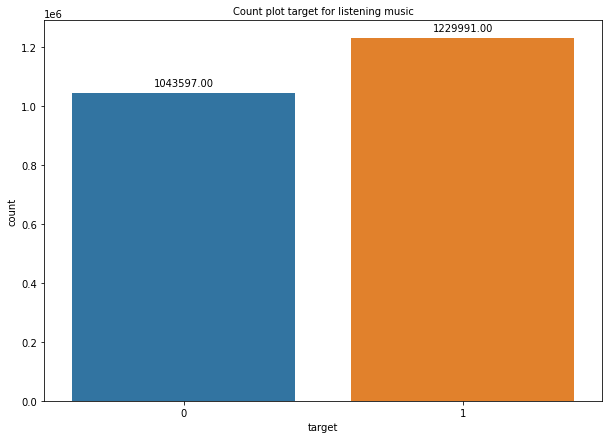

In [ ]:
plt.figure(figsize=(10,7))
plot = sns.countplot(x ='target', data = removed_null_data)
plt.title('Count plot target for listening music',fontsize=10)

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2.,
                p.get_height()),
               ha = 'center',va = 'center', xytext = (0, 10), textcoords = 'offset points')

* The Target 0 gets reduced if we remove the null values completely

In [ ]:
label_encoding(removed_null_data)

user_id
song_id
source_system_tab
source_screen_name
source_type
gender
artist_name
composer
lyricist
genre_ids
language
song_length


,user_id,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,song_length,genre_ids,artist_name,composer,lyricist,language,count_of_genre_ids,count_of_artist,count_of_composer,count_of_lyricist
6,7267,37174,3,8,4,1,13,24,0,9,...,11281,167,436,17171,15820,5,1,1,3,2
7,10918,37174,0,11,6,0,15,18,1,4,...,11281,167,436,17171,15820,5,1,1,3,2
8,6491,37174,3,8,3,1,13,34,1,9,...,11281,167,436,17171,15820,5,1,1,3,2
10,3944,37174,3,9,3,0,15,26,0,9,...,11281,167,436,17171,15820,5,1,1,3,2
11,2883,37174,3,8,4,1,22,28,0,7,...,11281,167,436,17171,15820,5,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4429655,10713,65321,3,8,3,0,6,31,1,9,...,3126,167,6785,9390,7355,4,1,1,1,1
4429684,5431,19997,6,15,8,0,5,41,1,9,...,19630,167,1338,2682,15783,3,1,1,1,1
4429690,8139,10922,6,0,0,0,22,20,1,3,...,9132,167,7542,25083,24548,1,1,1,1,1
4429694,5676,53987,6,15,8,1,5,31,1,9,...,15318,161,4842,19882,18403,1,1,1,1,1


### 3: Making a new label as Missing 

In [ ]:
missing_label_merged_data = merged_music_data.copy()

for col in missing_label_merged_data.columns:
    if col != 'language':
        missing_label_merged_data[col].fillna('missing',inplace=True)
    else:
        missing_label_merged_data[col].fillna(0,inplace=True)

In [ ]:
missing_label_merged_data.isnull().sum()

user_id                         0
song_id                         0
source_system_tab               0
source_screen_name              0
source_type                     0
target                          0
city                            0
bd                              0
gender                          0
registered_via                  0
registration_year               0
registration_expire_year        0
registration_month              0
expiration_month                0
registration_date               0
registration_expiration_date    0
song_length                     0
genre_ids                       0
artist_name                     0
composer                        0
lyricist                        0
language                        0
count_of_genre_ids              0
count_of_artist                 0
count_of_composer               0
count_of_lyricist               0
dtype: int64

In [ ]:
missing_label_merged_data.head(20)

,user_id,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,song_length,genre_ids,artist_name,composer,lyricist,language,count_of_genre_ids,count_of_artist,count_of_composer,count_of_lyricist
0,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,...,284584,1259,Various Artists,missing,missing,52.0,1,1,0,0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,...,225396,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,missing,52.0,1,1,1,0
2,frZtrrN1Y2ZqZX3VFiq7FpAvLth3kZJNovT9cmyn2O4=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,radio,Radio,radio,0,22,31,male,3,...,225396,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,missing,52.0,1,1,1,0
3,BBox7sGGCdPkB12i3nWaMAv/ggYUEtfOWKkrbRMb3gk=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,radio,Radio,radio,0,13,58,female,3,...,225396,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,missing,52.0,1,1,1,0
4,O7OWTSBR3kYP6neyMMy5+u9mUFgIN4iFETbDgzB2YQM=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,17,female,3,...,225396,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,missing,52.0,1,1,1,0
5,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24,female,9,...,255512,1019,Soundway,Kwadwo Donkoh,missing,-1.0,1,1,1,0
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1,13,24,female,9,...,229982,465,BIGBANG TAEYANG,TEDDY| DEE.P| Rebecca Johnson,TEDDY| TAEYANG,31.0,1,1,3,2
7,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,discover,Online playlist more,online-playlist,0,15,18,male,4,...,229982,465,BIGBANG TAEYANG,TEDDY| DEE.P| Rebecca Johnson,TEDDY| TAEYANG,31.0,1,1,3,2
8,ULaS7iTeNVqlI45nQEFyye+QRhPy1TvABDDu8AXool0=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-library,1,13,34,male,9,...,229982,465,BIGBANG TAEYANG,TEDDY| DEE.P| Rebecca Johnson,TEDDY| TAEYANG,31.0,1,1,3,2
9,dEK1cVfdGaKd5ihXxCzf1HbZjR8+JdTYvfHFEnNz3cQ=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,discover,missing,local-library,1,13,19,male,4,...,229982,465,BIGBANG TAEYANG,TEDDY| DEE.P| Rebecca Johnson,TEDDY| TAEYANG,31.0,1,1,3,2


In [ ]:
label_encoding(missing_label_merged_data)

user_id
song_id
source_system_tab
source_screen_name
source_type
gender
artist_name
composer
lyricist
genre_ids
language
song_length


,user_id,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,song_length,genre_ids,artist_name,composer,lyricist,language,count_of_genre_ids,count_of_artist,count_of_composer,count_of_lyricist
0,7601,173446,4,8,4,1,13,24,0,9,...,32983,81,25520,52995,19139,9,1,1,0,0
1,7601,93807,4,8,4,1,13,24,0,9,...,20891,81,17074,36670,19139,9,1,1,1,0
2,9317,93807,6,14,8,0,22,31,1,3,...,20891,81,17074,36670,19139,9,1,1,1,0
3,2773,93807,6,14,8,0,13,58,0,3,...,20891,81,17074,36670,19139,9,1,1,1,0
4,5466,93807,4,8,4,1,13,17,0,3,...,20891,81,17074,36670,19139,9,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4429692,8523,34508,7,0,0,1,22,20,1,3,...,16503,308,16692,1668,19139,5,1,1,1,0
4429693,401,33206,7,0,0,0,22,18,1,3,...,19158,317,24660,52995,19139,9,1,1,0,0
4429694,5939,214693,7,15,9,1,5,31,1,9,...,27339,311,25520,53576,19626,2,1,1,1,1
4429695,12648,73757,4,8,4,1,12,35,1,3,...,9340,317,31738,20668,11086,5,1,1,1,1


## Implementing Models

* We will be using AUC Score for selecting the model as it it metric which is used on Kaggle.

In [ ]:
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


x_train_mode, x_test_mode, y_train_mode, y_test_mode = train_test_split(mode_merged_data.drop(['target']
                                                                                              ,axis=1),
                                                    mode_merged_data['target'],test_size=0.20,random_state=40)

x_train_removed_null, x_test_removed_null,y_train_removed_null, y_test_removed_null = train_test_split(removed_null_data.drop(['target'],
                                                                                                                              axis=1),
                 removed_null_data['target'],test_size=0.20,random_state=40)

x_train_missing_label, x_test_missing_label, y_train_missing_label, y_test_missing_label = train_test_split(missing_label_merged_data.drop(['target'],axis=1),
                 missing_label_merged_data['target'],test_size=0.20,random_state=40)



In [ ]:
x_train_mode.head()

,user_id,song_id,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,registration_year,...,song_length,genre_ids,artist_name,composer,lyricist,language,count_of_genre_ids,count_of_artist,count_of_composer,count_of_lyricist
3446408,2136,256124,0,4,6,22,31,1,9,2009,...,10748,470,27498,53718,27083,3,1,1,1,0
1856049,10893,153103,0,11,9,5,30,1,9,2011,...,16810,317,26955,29541,10364,5,1,1,2,2
1775967,9068,86356,5,14,7,21,33,1,7,2011,...,28969,317,463,60596,21382,1,1,1,1,1
2367315,13381,19814,0,4,9,4,43,0,9,2008,...,21502,311,7743,15476,3118,1,1,1,1,1
3647076,4595,47744,6,15,8,5,33,1,9,2011,...,19252,205,17574,19556,27083,0,1,1,1,0


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# for mode
model.fit(x_train_mode,y_train_mode)
predict_mode = model.predict(x_test_mode)

print("Model Accuracy on Mode Data: ",roc_auc_score(predict_mode,y_test_mode))

# for removed_data
model.fit(x_train_removed_null,y_train_removed_null)
predict_removed_null = model.predict(x_test_removed_null)
try:
    print("Model Accuracy on Removed Null Data: ",roc_auc_score(predict_removed_null,y_test_removed_null))
except ValueError:
    print("Only One Class Present")


# for new_missing_label
model.fit(x_train_missing_label,y_train_missing_label)
predict_missing_label = model.predict(x_test_missing_label)

print("Model Accuracy on New Missing label Data: ",roc_auc_score(predict_missing_label,y_test_missing_label))


Model Accuracy on Mode Data:  0.5223820592044888
Model Accuracy on Removed Null Data:  0.5265831802082662


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

# for mode
model.fit(x_train_mode,y_train_mode)
predict_mode = model.predict(x_test_mode)

print("Model Accuracy on Mode Data: ",roc_auc_score(predict_mode,y_test_mode))

# for removed_data
model.fit(x_train_removed_null,y_train_removed_null)
predict_removed_null = model.predict(x_test_removed_null)
try:
    print("Model Accuracy on Removed Null Data: ",roc_auc_score(predict_removed_null,y_test_removed_null))
except ValueError:
    print("Only One Class Present")


# for new_missing_label
model.fit(x_train_missing_label,y_train_missing_label)
predict_missing_label = model.predict(x_test_missing_label)

print("Model Accuracy on New Missing label Data: ",roc_auc_score(predict_missing_label,y_test_missing_label))

### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

# for mode
rf_model.fit(x_train_mode,y_train_mode)
predict_mode = model.predict(x_test_mode)

print("Model Accuracy on Mode Data: ",accuracy_score(predict_mode,y_test_mode))

# for removed_data
rf_model.fit(x_train_removed_null,y_train_removed_null)
predict_removed_null = model.predict(x_test_removed_null)

print("Model Accuracy on Removed Null Data: ",accuracy_score(predict_removed_null,y_test_removed_null))

# for new_missing_label
rf_model.fit(x_train_missing_label,y_train_missing_label)
predict_missing_label = model.predict(x_test_missing_label)

print("Model Accuracy on New Missing label Data: ",accuracy_score(predict_missing_label,y_test_missing_label))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 200)

# for mode
rf_model.fit(x_train_mode,y_train_mode)
predict_mode = model.predict(x_test_mode)

print("Model Accuracy on Mode Data: ",accuracy_score(predict_mode,y_test_mode))

# for removed_data
rf_model.fit(x_train_removed_null,y_train_removed_null)
predict_removed_null = model.predict(x_test_removed_null)

print("Model Accuracy on Removed Null Data: ",accuracy_score(predict_removed_null,y_test_removed_null))

# for new_missing_label
rf_model.fit(x_train_missing_label,y_train_missing_label)
predict_missing_label = model.predict(x_test_missing_label)

print("Model Accuracy on New Missing label Data: ",accuracy_score(predict_missing_label,y_test_missing_label))

In [ ]:
rf_model.auc

### XGBClassifier

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(enable_categorical=True)

# for mode
model.fit(x_train_mode,y_train_mode)
predict_mode = model.predict(x_test_mode)

print("Model Accuracy on Mode Data: ",accuracy_score(predict_mode,y_test_mode))

# for removed_data
model.fit(x_train_removed_null,y_train_removed_null)
predict_removed_null = model.predict(x_test_removed_null)

print("Model Accuracy on Removed Null Data: ",accuracy_score(predict_removed_null,y_test_removed_null))

# for new_missing_label
model.fit(x_train_missing_label,y_train_missing_label)
predict_missing_label = model.predict(x_test_missing_label)

print("Model Accuracy on New Missing label Data: ",accuracy_score(predict_missing_label,y_test_missing_label))

# XGBoost

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=2)

# for mode
model.fit(x_train_mode, y_train_mode)
predict_mode = model.predict(x_test_mode)

print("Model Accuracy on Mode Data: ", accuracy_score(predict_mode,
                                                      y_test_mode))

# for removed_data
model.fit(x_train_removed_null, y_train_removed_null)
predict_removed_null = model.predict(x_test_removed_null)

print("Model Accuracy on Removed Null Data: ",
      accuracy_score(predict_removed_null, y_test_removed_null))

# for new_missing_label
model.fit(x_train_missing_label, y_train_missing_label)
predict_missing_label = model.predict(x_test_missing_label)

print("Model Accuracy on New Missing label Data: ",
      accuracy_score(predict_missing_label, y_test_missing_label))

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=5)

# for mode
model.fit(x_train_mode, y_train_mode)
predict_mode = model.predict(x_test_mode)

print("Model Accuracy on Mode Data: ", accuracy_score(predict_mode,
                                                      y_test_mode))

# for removed_data
model.fit(x_train_removed_null, y_train_removed_null)
predict_removed_null = model.predict(x_test_removed_null)

print("Model Accuracy on Removed Null Data: ",
      accuracy_score(predict_removed_null, y_test_removed_null)) 

# for new_missing_label
model.fit(x_train_missing_label, y_train_missing_label)
predict_missing_label = model.predict(x_test_missing_label)

print("Model Accuracy on New Missing label Data: ",
      accuracy_score(predict_missing_label, y_test_missing_label))

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=50)

# for mode
model.fit(x_train_mode, y_train_mode)
predict_mode = model.predict(x_test_mode)

print("Model Accuracy on Mode Data: ", accuracy_score(predict_mode,
                                                      y_test_mode))

# for removed_data
model.fit(x_train_removed_null, y_train_removed_null)
predict_removed_null = model.predict(x_test_removed_null)

print("Model Accuracy on Removed Null Data: ",
      accuracy_score(predict_removed_null, y_test_removed_null))

# for new_missing_label
model.fit(x_train_missing_label, y_train_missing_label)
predict_missing_label = model.predict(x_test_missing_label)

print("Model Accuracy on New Missing label Data: ",
      accuracy_score(predict_missing_label, y_test_missing_label))

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100)

# for mode
model.fit(x_train_mode, y_train_mode)
predict_mode = model.predict(x_test_mode)

print("Model Accuracy on Mode Data: ", accuracy_score(predict_mode,
                                                      y_test_mode))

# for removed_data
model.fit(x_train_removed_null, y_train_removed_null)
predict_removed_null = model.predict(x_test_removed_null)

print("Model Accuracy on Removed Null Data: ",
      accuracy_score(predict_removed_null, y_test_removed_null))

# for new_missing_label
model.fit(x_train_missing_label, y_train_missing_label)
predict_missing_label = model.predict(x_test_missing_label)

print("Model Accuracy on New Missing label Data: ",
      accuracy_score(predict_missing_label, y_test_missing_label))

## Feature Importance

In [ ]:
x_train_missing_label.columns

In [ ]:
feature_importance = pd.DataFrame({'Features':x_train_missing_label.columns,
                                  'Importance':rf_model.feature_importances_})

feature_importance

In [ ]:
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance['Features'], y=feature_importance['Importance'],
            data = feature_importance,order=feature_importance.sort_values('Importance').Features).set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()

## Conclusion:
* Looking at the feature importance the user who is listening the song has the highest weightage
* It's possible that on Registration day and Service Expiration day people use the app more and thus listen to songs on repeat.
* Age (bd) is always a factor as the dataset has a mean age of 17 years and youngsters do listen to more music
* Composer and Artist are also important features.